# Exploratory Data Analysis - 'wine.csv' data set

- importing packages

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly_express as px 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator 
import PIL.Image
import numpy as np
import seaborn as sns



- Loading the data set

In [20]:
wine = pd.read_csv('wine.csv')
wine.shape # displays the length of the data set

(1103, 11)

- Reading the data set

In [21]:
wine # displays first and last 5 observations

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selecci√≥n Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodr√≠guez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La B√©gude, named af...",La Br√ªlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la B√©gude
...,...,...,...,...,...,...,...,...,...,...,...
1098,1098,US,Subdued is a good way to describe this light-b...,NaN,87,12.0,California,California,California Other,White Blend,Kitchen Sink
1099,1099,US,"While spry and dry in style, fragrant apricot ...",Hobbit Hollow Farm Dry,87,20.0,New York,Finger Lakes,Finger Lakes,Riesling,Heron Hill
1100,1100,US,Coming from the cool 2011 vintage this wine of...,Cold Creek Vineyard,87,28.0,Washington,Columbia Valley (WA),Columbia Valley,Merlot,Chateau Ste. Michelle
1101,1101,France,"This concentrated, structured wine has an eart...",NaN,87,27.0,Bordeaux,Listrac-M√©doc,NaN,Bordeaux-style Red Blend,Ch√¢teau Vieux Moulin


### Data cleaning

In [22]:
wine.columns # displays all the columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')

In [23]:
wine.describe() # describe the numerical features

,Unnamed: 0,points,price
count,1103.000000,1103.000000,1046.000000
mean,551.000000,89.701723,40.242830
std,318.552978,2.390405,32.588141
min,0.000000,85.000000,7.000000
25%,275.500000,88.000000,20.000000
50%,551.000000,90.000000,31.000000
75%,826.500000,91.000000,50.000000
max,1102.000000,96.000000,500.000000


- Dropping redundant columns

In [24]:
wine.drop('Unnamed: 0', axis=1,inplace=True) # dropping redundant column
wine.dtypes # displays data types

country         object
description     object
designation     object
points           int64
price          float64
province        object
region_1        object
region_2        object
variety         object
winery          object
dtype: object

- Check for missing values

In [25]:
wine.isna().sum() # displays sum of missing values for each column

country          0
description      0
designation    269
points           0
price           57
province         0
region_1       173
region_2       611
variety          0
winery           0
dtype: int64

### Dealing with missing values

- Replace missing values for 'designation', 'region_1' and 'region_2' with 'Unknown'

In [26]:
wine['designation'] = wine['designation'].fillna(value='Unknown')
wine['region_1'] = wine['region_1'].fillna(value='Unknown')
wine['region_2'] = wine['region_2'].fillna(value='Unknown')
wine.isna().sum()

country         0
description     0
designation     0
points          0
price          57
province        0
region_1        0
region_2        0
variety         0
winery          0
dtype: int64

- Replace numeric missing values for 'price' with mean value

In [27]:
avg_price = wine['price'].mean()
wine['price'] = wine['price'].fillna(value=avg_price)
wine.isna().sum()

country        0
description    0
designation    0
points         0
price          0
province       0
region_1       0
region_2       0
variety        0
winery         0
dtype: int64

### Data exploration and visualisations

- Wineries count by countries

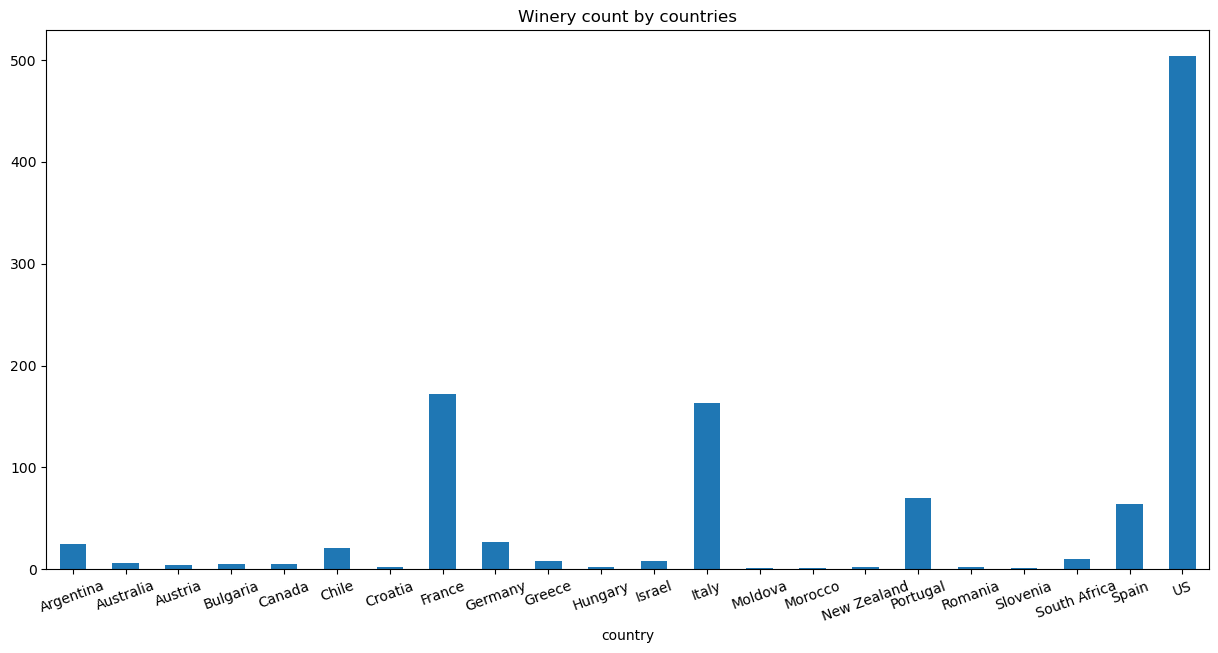

In [28]:

fig = plt.figure(figsize=(15,7))
wine.groupby('country').winery.count().plot.bar(ylim=0)
plt.xticks(rotation=20)
plt.title('Winery count by countries')
plt.show()
# The chart below shows that there are significantly more wineries in Us than any other country

- Points distribution over countries

Text(0.5, 1.0, 'Points by country')

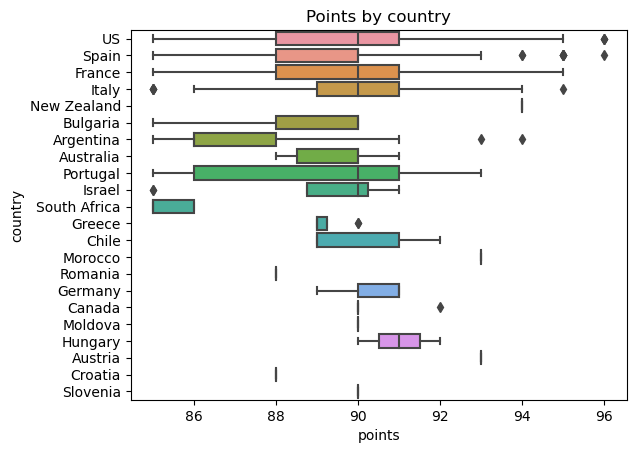

In [29]:
sns.boxplot(wine,y='country',x='points')
wine[['points']].describe()
plt.title('Points by country')
# Considering the outliers, US followed by France and Spain seems to have higher distribution of points

- Price by country

,price
count,1103.000000
mean,40.242830
std,31.734154
min,7.000000
25%,22.000000
50%,34.000000
75%,49.000000
max,500.000000


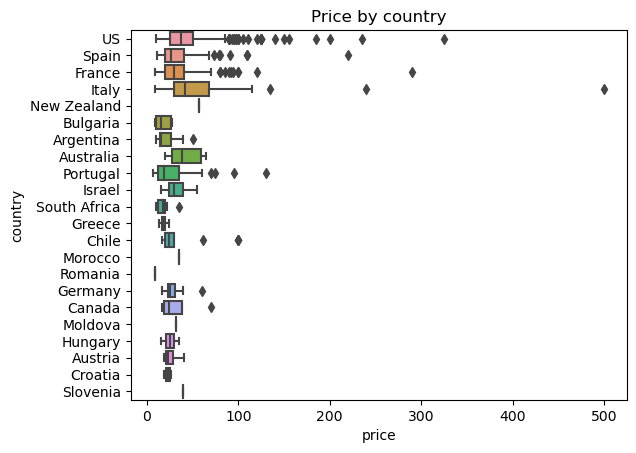

In [30]:
sns.boxplot(wine,y='country',x='price')
plt.title('Price by country')
wine[['price']].describe()
# The boxplot below suggests that Italian wine is the most expensive, taking or not outliers in consideration.
# The cheapest wines are found in Romania.

- Price vs points correlation

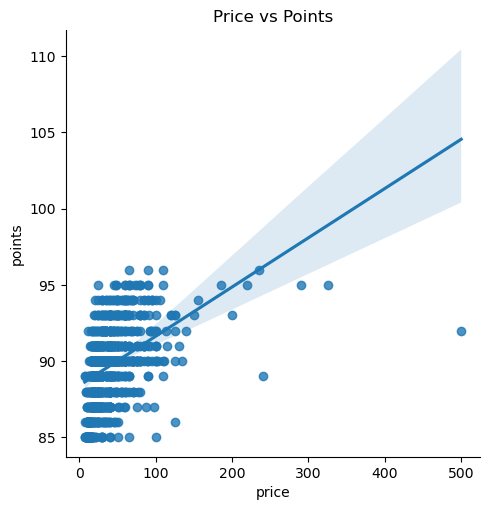

In [31]:
sns.lmplot(wine,x='price',y='points')
plt.title('Price vs Points')
plt.show()
# Although it may seem that the points could affect the price, 
# the chart below suggests that is not always the case

- Price per wine variety

In [32]:
wine[['variety', 'price']].sort_values(by='price')
# Displays top 5 most expensive and top 5 cheapest wine variety

,variety,price
995,Alicante Bouschet,7.0
776,Portuguese Red,7.0
119,Portuguese Red,7.0
1004,Portuguese Red,7.0
932,Portuguese Red,7.0
...,...,...
0,Cabernet Sauvignon,235.0
954,Red Blend,240.0
18,Malbec,290.0
16,Cabernet Sauvignon,325.0


- Visualisation on wine variety and price

In [33]:

fig= px.scatter(wine, x='price', y='winery', hover_name='province',
    title='Winery price by province (hover over each dot for more details)')
fig.show()
# The most expensive variety is Red Blend priced 500

In [34]:
fig= px.scatter(wine, x='price', y='variety', hover_name='country',
    size='points', color='winery', facet_col_spacing=1,
    title='Wine variety price by winery and country of origin (hover over each dot for more details)')
fig.show()

- Create a multi-grid with selected wine variety ('Cabernet Sauvignon', 'Pinot Noir', 'Chardonnay') and their points distribution

<Figure size 640x480 with 0 Axes>

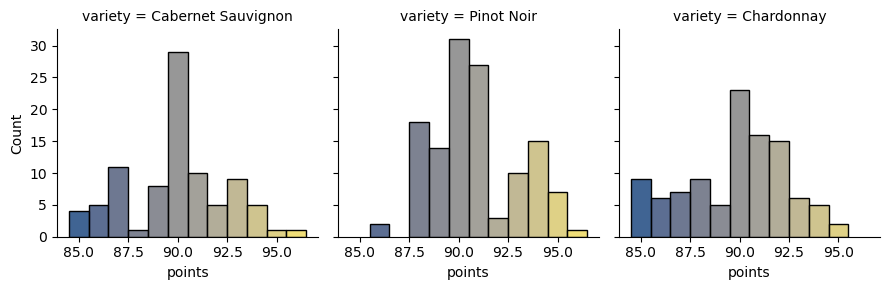

In [35]:
plt.figure()

fg = sns.FacetGrid(wine, col='variety', col_order=['Cabernet Sauvignon', 'Pinot Noir', 'Chardonnay'], hue='points', palette='cividis')
fg.map(sns.histplot, 'points')
plt.show()
# From selected wine variety Pinot Noir is the variety with the highest points distributed, most of the points being in the range 87.5 and 91.5.

- Province and variety features Word Cloud visualisation

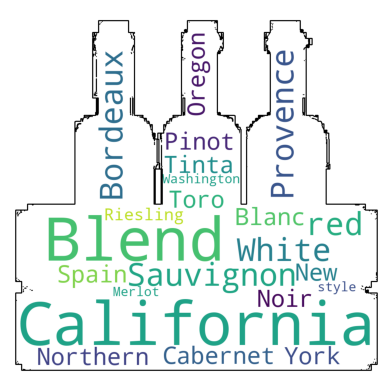

In [36]:
mask = np.array(PIL.Image.open('bottles.jpeg'))
wordcloud = WordCloud(stopwords=set(list(STOPWORDS)+['rows','columns', 'de','x','variety','province']),
            background_color='white',
            contour_color = 'black',
            contour_width=3,
            min_font_size=3,
            max_words=400,
            mask=mask).generate(str(wine[['province', 'variety']]))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
